In [23]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr # to read .rds files

In [9]:
# Paths

path_params_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/UQ/params/"
path_processed_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/"

In [21]:
N_ensembles=32

params_list = ["fates_cnp_vmax_nh4","fates_cnp_vmax_no3","fates_cnp_vmax_p"]

In [19]:

fnames={} # processed data
fnames_params={} # processed data

case_id = "FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax"
sites= ("US-ORN", "US-DUK")
#sites= ("US-ORN",)#, "US-DUK")
for site in sites:
    for idx in range(N_ensembles):
        # C-Only
        i= idx+1
        fnames[f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_processed_head}{case_id}_processed/{case_id}_{site}_spins_g{i:05d}.nc"
        fnames_params[f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_params_head}{case_id}_{site}_I1850ELMFATES_ad_spinup/fates_params_{i:05d}.nc"



In [34]:
ds_params = {}
dict_params = {} # to store the params values
for parm in params_list:
    dict_params[parm] = []

for idx, key in enumerate(fnames_params.keys()):
    print (key)
    ds_params[key] = xr.open_mfdataset(fnames_params[key], decode_times=False) 
    # making list of param values
    for parm in params_list:
        dict_params[parm].append(ds_params[key][parm].values[0])
    


FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00001
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00002
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00003
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00004
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00005
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00006
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00007
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00008
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00009
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00010
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00011
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00012
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVmax_US-ORN_spins_g00013
FACE_1PFT_AllomBlVmax_r240418_woL2FRf_CONew_D_enVma

In [37]:
dict_params

{'fates_cnp_vmax_nh4': [1.383843913013808e-06,
  6.000297687784044e-06,
  8.219544369168172e-06,
  6.280537516800115e-06,
  6.005044141412399e-07,
  5.662409900880971e-06,
  4.906137466930886e-06,
  9.910889464621926e-06,
  7.80666396610236e-06,
  6.982882518092569e-06,
  5.036986113759689e-06,
  8.229065733510732e-06,
  9.338425061434018e-06,
  1.2849485363179517e-06,
  1.2272911569438122e-06,
  2.5647762386698057e-06,
  4.586143410652692e-06,
  8.713901372612339e-06,
  4.707692053986557e-06,
  7.830368749697785e-06,
  9.033567809677885e-06,
  3.9808110631276064e-06,
  3.7529949196835643e-06,
  1.1718386671285196e-06,
  3.6879079772340474e-06,
  3.009134120605901e-06,
  3.4585142407023597e-06,
  8.054405691995952e-06,
  3.4297772540315457e-06,
  5.77487816753178e-06,
  1.4047645993950694e-06,
  9.897753354890412e-06,
  2.2580310588131017e-06,
  6.224199133900806e-07,
  4.8068418752068495e-06,
  4.2114222402358896e-07,
  2.3125333132506806e-06,
  8.509308008037694e-06,
  1.239248726518

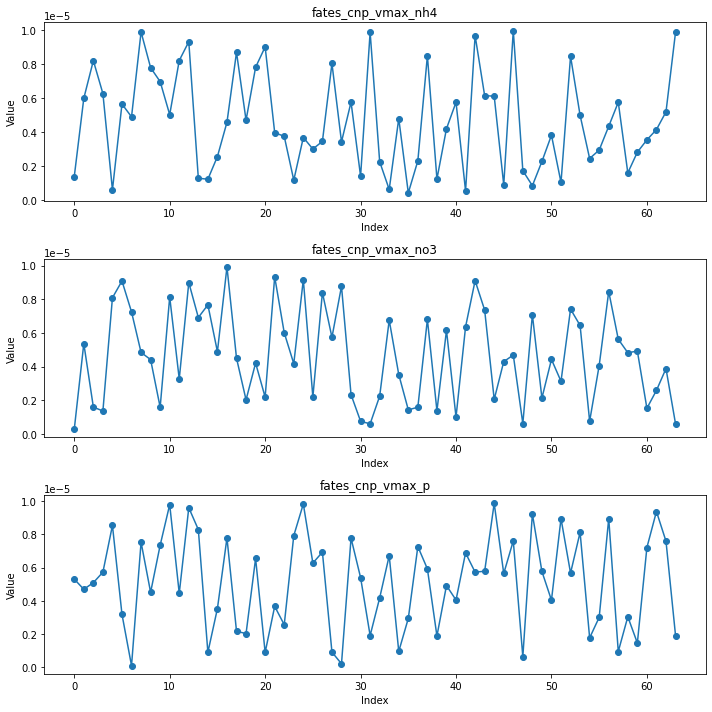

In [38]:
# Create subplots
fig, axs = plt.subplots(3, figsize=(10, 10))

# Plot each dimension
for i, (key, values) in enumerate(dict_params.items()):
    axs[i].plot(range(len(values)), values, marker='o', linestyle='-')
    axs[i].set_title(key)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [30]:
import pandas as pd

# Sample data
data = {
    'value': [1, 2, 3, 4, 5, 6],
}

# Define index levels
index_level1 = ['A', 'A', 'A', 'B', 'B', 'B']
index_level2 = ['X', 'Y', 'Z', 'X', 'Y', 'Z']
index_level3 = ['I', 'II', 'III', 'I', 'II', 'III']

# Create MultiIndex
multi_index = pd.MultiIndex.from_arrays([index_level1, index_level2, index_level3], names=['Index1', 'Index2', 'Index3'])

# Create DataFrame
df = pd.DataFrame(data, index=multi_index)

# Display DataFrame
print(df)


                      value
Index1 Index2 Index3       
A      X      I           1
       Y      II          2
       Z      III         3
B      X      I           4
       Y      II          5
       Z      III         6


In [31]:
df

value
Index1 Index2 Index3       
A      X      I           1
       Y      II          2
       Z      III         3
B      X      I           4
       Y      II          5
       Z      III         6

In [3]:
import itertools

# Define the range for parameter values
min_value = 1e-11
max_value = 1e-5
num_values = 6  # 1 value per order? can be changed. total combinations will be 6x6x6: 216

# Generate values for each parameter within the specified range
param_values = [min_value + i * (max_value - min_value) / (num_values - 1) for i in range(num_values)]

# Generate combinations of parameter values
combinations = list(itertools.product(param_values, repeat=3))

# Save combinations to a space-delimited text file
with open("combinations.txt", "w") as f:
    for comb in combinations:
        f.write("  ".join(map(str, comb)) + "\n")


In [2]:
len(combinations)

216